# Mirror Image Source Model

In [1]:
import numpy as np
import sfs
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline

## Compute and illustrate mirror image sources for a two-dimensional room

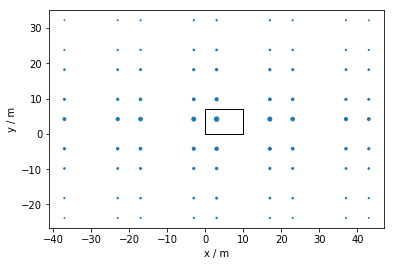

In [2]:
room_dim = [10, 7]
x = [3, 4.2]
order = 4

xs, walls = sfs.util.image_sources_for_box(x, room_dim, order)

reflection_coeffs = [0.8, 0.8, 0.6, 0.5]
source_strength = np.prod(reflection_coeffs**walls, axis=1)     

plt.figure()
plt.scatter(*xs.T, source_strength*20)
plt.gca().add_patch(Rectangle( (0, 0), room_dim[0], room_dim[1], fill=False))

plt.xlabel('x / m')
plt.ylabel('y / m')

## Monochromatic Sound Field

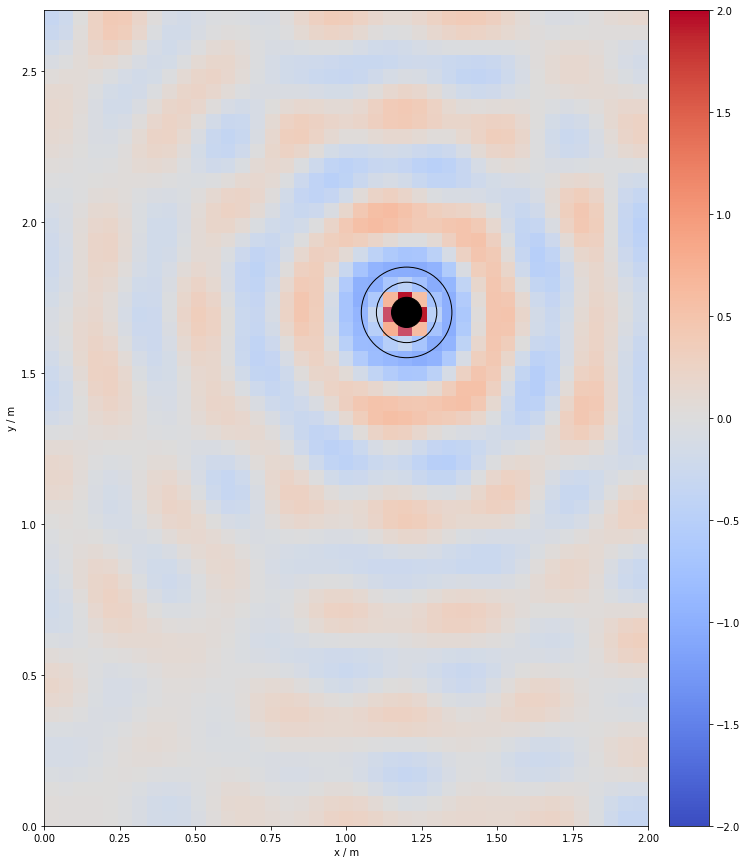

In [3]:
grid = sfs.util.xyz_grid([0, 2], [0, 2.7], 0, spacing=0.05)
x0 = [1.2, 1.7, 0]
n0 = [1, 0, 0]
omega = 2*np.pi*1000
L = [2, 2.7, 3]
coeffs = [.8, .8, .6, .6, .7, .7]
order = 2

P = sfs.mono.source.point_mism(omega, x0, n0, grid, L, order, coeffs=coeffs)

plt.figure(figsize=(15, 15))
sfs.plot.soundfield(P, grid)
sfs.plot.virtualsource_2d(x0)

## Spatio-Temporal Impulse Response

/Users/spors/Documents/src/SFS-python/sfs/time/source.py:58: RuntimeWarning: divide by zero encountered in true_divide
  weights = 1 / (4 * np.pi * r)
/Users/spors/Documents/src/SFS-python/sfs/time/source.py:63: RuntimeWarning: invalid value encountered in multiply
  data, left=0, right=0)


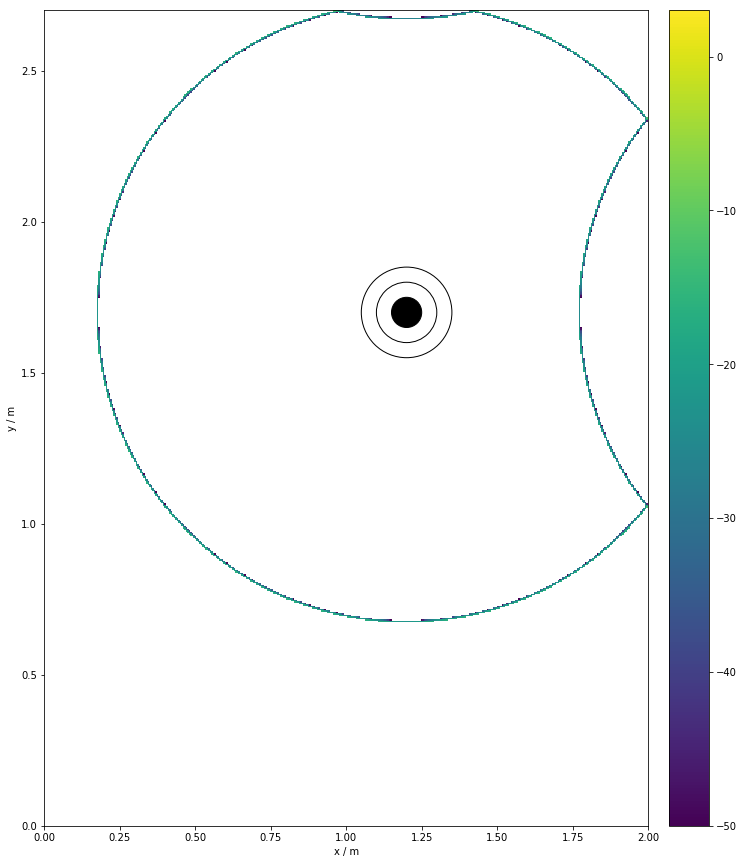

In [4]:
fs = 44100
grid = sfs.util.xyz_grid([0, 2], [0, 2.7], 0, spacing=0.005)
signal = ([1, 0, 0],fs,0.0)

p = sfs.time.source.point_mism(x0, signal, 0.003, grid, L, order, coeffs=coeffs)
p = p * 1

plt.figure(figsize=(15, 15))
sfs.plot.level(p, grid)
sfs.plot.virtualsource_2d(x0)